1.	Write an introduction about what type of analysis you plan to execute. Provide a brief data description: what are your data about; how many variables and observations there?


dataset containing information about the numbers of new cases and deaths related to COVID-19 in five main states in Australia: NSW, Vic, QLD, SA, and WA. The dataset includes both daily and weekly data and covers a period up to September 9, 2022.

Your goal is to analyze this data on a weekly basis, so you will need to aggregate the daily data into weekly data points. Additionally, you will be using the "NEW" column in the dataset to calculate your own number for total cases, rather than the "NET" column, which contains adjusted numbers.

The dataset contains 4935 rows, but it's unclear from your description how many columns/variables there are in the dataset. In terms of the analysis you plan to execute, it would be helpful to have a bit more information about your research question and the specific types of analyses you're planning to perform.

Overall, your report will provide valuable insights into the COVID-19 situation in these five states in Australia, helping to shed light on the impact of the pandemic on the region and informing public health decision-making.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")
# Set the default style for all plots
sns.set_style("white")

%matplotlib inline

#### Data cleaning


 cleaned and merged data from multiple sources to create a comprehensive dataset on COVID-19 cases and deaths in five Australian states: NSW, QLD, VIC, WA, and SA. 
 
 these cleaning steps help to ensure that the data is consistent and standardized across all of the states, making it easier to perform analyses and draw conclusions about the COVID-19 situation in Australia.

In [2]:
# all data files are in the same folder as the notebook

# Define a list of state abbreviations
states = ['nsw', 'qld', 'vic', 'wa', 'sa']

# Create an empty list to store the dataframes
dfs = []

# Loop over the state abbreviations and read in the case and death data
for state in states:
    case_file = f'daily_cases_{state}.tsv'
    death_file = f'daily_death_{state}.tsv'
    case_data = pd.read_csv(case_file, sep='\t')
    death_data = pd.read_csv(death_file, sep='\t')
    
    # Merge the case and death data into a single dataframe
    merged_data = pd.merge(case_data, death_data, on='DATE')
    
    # Add a state column to the dataframe
    merged_data['state'] = state
    
    # Append the dataframe to the list of dataframes
    dfs.append(merged_data)

# Concatenate all of the dataframes into a single dataframe
all_data = pd.concat(dfs, axis=0)

# change column name VAR_x to var_cases, VAR_y to var_deaths
all_data = all_data.rename(columns={'VAR_x': 'var_cases', 'VAR_y': 'var_deaths', 'NET_x': 'net_cases', 'NET_y': 'new_deaths'})

# change all column names to lowercase
all_data.columns = all_data.columns.str.lower()



In addition to the previous data cleaning and preprocessing steps, I performed some further cleaning on the COVID-19 dataset. Here's a summary of what I did:

First, I checked the shape of the dataframe to make sure that all the data was loaded correctly.

Then, I checked the 'var_cases' and 'var_deaths' columns for missing values. Fortunately, there were no missing values in these columns.

Since we didn't need the 'var_cases' and 'var_deaths' columns for analysis, I dropped them from the dataframe.

To double-check that the columns were dropped, I checked the information on the dataframe.

Next, I checked for missing values in the 'new' column, which contained weekly data reports. I found that there were some missing values in this column.

Additionally, I checked for 0 values in the 'new' column, which could indicate data entry errors.

To standardize the data, I replaced all missing values in the 'new' column with 0.

Finally, I checked the information on the dataframe again to ensure that the 'new' column now contained no missing values.

By performing these additional cleaning steps, we can ensure that the data is standardized, accurate, and ready for analysis.

In [3]:
# check if all var_cases and var_deaths are null
print(all_data.shape)
# count the number of missing values in var_cases and var_deaths
print(all_data['var_cases'].isnull().sum())
print(all_data['var_deaths'].isnull().sum())
# drop the column var_cases and var_deaths
all_data = all_data.drop(columns=['var_cases', 'var_deaths'])
all_data.info()

(4935, 9)
4935
4935
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4935 entries, 0 to 986
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        4935 non-null   object
 1   new         4927 non-null   object
 2   cases       4935 non-null   object
 3   net_cases   4935 non-null   object
 4   deaths      4935 non-null   object
 5   new_deaths  4935 non-null   object
 6   state       4935 non-null   object
dtypes: object(7)
memory usage: 308.4+ KB


In [4]:
# get all the missing values in 'new' column
all_data[all_data['new'].isnull()]

,date,new,cases,net_cases,deaths,new_deaths,state
986,25 Jan 20,NaN,3,-,0,-,nsw
12,30 Dec 22,NaN,"1,743,616",0,"2,405",0,qld
33,04 Sep 22,NaN,"1,610,200",0,"1,986",0,qld
34,03 Sep 22,NaN,"1,610,200",0,"1,986",0,qld
986,25 Jan 20,NaN,0,-,0,-,qld
986,25 Jan 20,NaN,1,-,0,-,vic
986,25 Jan 20,NaN,0,-,0,-,wa
986,25 Jan 20,NaN,0,-,0,-,sa


In [5]:
# get all the 0 values in 'new' column
all_data[all_data['new'] == 0]

,date,new,cases,net_cases,deaths,new_deaths,state


In [6]:
# replace all the NAN values in 'new' column with 0
all_data['new'] = all_data['new'].fillna(0)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4935 entries, 0 to 986
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        4935 non-null   object
 1   new         4935 non-null   object
 2   cases       4935 non-null   object
 3   net_cases   4935 non-null   object
 4   deaths      4935 non-null   object
 5   new_deaths  4935 non-null   object
 6   state       4935 non-null   object
dtypes: object(7)
memory usage: 308.4+ KB


In these steps, we are cleaning and organizing the COVID-19 data from the five states in Australia. We start by converting the 'date' column to a date format and the 'state' column to categorical format. We then create two new dataframes, one with the 'date' and 'state' columns only, and the other with the 'new', 'deaths', 'cases', 'net_cases', and 'net_deaths' columns only.

Next, we remove any commas or non-numeric characters from the 'new', 'deaths', 'cases', 'net_cases', and 'net_deaths' columns, convert them to floats, replace any NaN values with 0, and then convert them to integers.

After that, we merge the two dataframes into one, sort it by date and state, and drop the 'net_cases', 'net_deaths', and 'cases' columns. We then group the data by state and calculate the cumulative sum of new cases for each state.

Finally, we sort the data by date and state again and end up with a clean and organized dataframe that we can use for further analysis.

In [7]:
# Change the date column to datetime
all_data['date'] = pd.to_datetime(all_data['date'])

# Change the state column to categorical
all_data['state'] = all_data['state'].astype('category')

# create a new dataframe with only date and state columns
date_state = all_data[['date', 'state']]

# create a new dataframe with only new, cases and deaths columns
new_cases_deaths = all_data[['new', 'deaths', 'cases', 'net_cases', 'new_deaths']]

# Remove commas from the number columns, and remove all non-numeric characters, replace float to int, NaN to 0
new_cases_deaths = new_cases_deaths.replace(',', '', regex=True).replace('[^0-9]', '', regex=True)
new_cases_deaths = new_cases_deaths.replace('', np.nan)
new_cases_deaths = new_cases_deaths.astype(float).fillna(0).astype(int)
new_cases_deaths.tail(10)

merged_data = pd.concat([date_state, new_cases_deaths], axis=1)
# rearrange the dataframe as date from 2020-01-05 to 2020-03-29 from oldest to newest
merged_data = merged_data.sort_values(by=['date'], ascending=True)

# check the three columns that the instruction asked to drop, which is the last three columns
merged_data.tail(10)

,date,state,new,deaths,cases,net_cases,new_deaths
1,2023-03-17,nsw,8905,6551,3924892,8900,22
1,2023-03-17,vic,3960,7399,2884504,3945,29
1,2023-03-17,sa,2347,1360,885961,2341,0
1,2023-03-17,wa,2625,985,1298606,2609,29
1,2023-03-17,qld,3049,2818,1656657,3147,22
0,2023-03-24,qld,3207,2834,1659913,3256,16
0,2023-03-24,sa,2888,1358,888775,2814,0
0,2023-03-24,vic,4467,7424,2888952,4448,25
0,2023-03-24,wa,0,985,1298606,0,0
0,2023-03-24,nsw,8563,6573,3933447,8555,22


In [8]:
# drop the last three columns
merged_data = merged_data.drop(columns=['net_cases', 'cases'])

# Group by state and calculate the cumulative sum of new cases
merged_data['case'] = merged_data.groupby('state')['new'].cumsum()

# Sort the data by date and state
merged_data = merged_data.sort_values(by=['date', 'state'])

This code creates a histogram to visualize the distribution of daily numbers of COVID-19 cases and deaths before September 9, 2022, and weekly data after that. It then creates a copy of the original dataframe and converts the 'date' column to a pandas datetime object. It creates a new column 'week_start' with the start of each week, groups the data by 'week_start' and 'state', and sums the 'new' column. It then renames the 'week_start' column to 'date', reorders the columns in the dataframe, and sorts the dataframe by date and state.

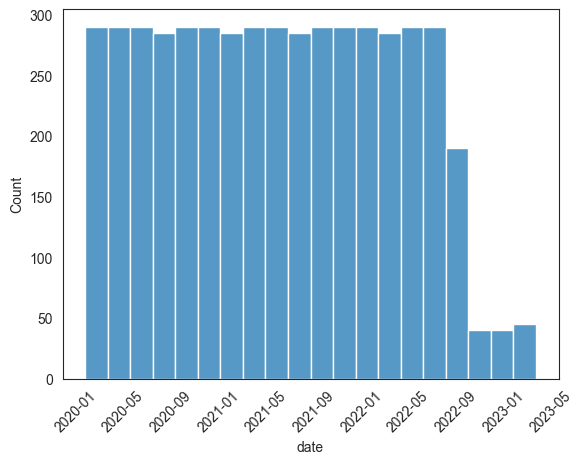

In [9]:
# check the mix of data – daily numbers before September 9, 2022, and weekly data after that
sns.histplot(data=merged_data, x="date", kde=False)
plt.xticks(rotation=45)
plt.show()

In [10]:
# Create a copy of the original dataframe
week_dis = merged_data.copy()

# Convert the 'date' column to a pandas datetime object
week_dis['date'] = pd.to_datetime(week_dis['date'])

# Create a new column 'week_start' with the start of each week
week_dis['week_start'] = week_dis['date'] - pd.to_timedelta((week_dis['date'].dt.dayofweek), unit='d')

# Group the data by 'week_start' and 'state', and sum the 'new' column
week_new = week_dis.groupby(['week_start', 'state']).agg({'new': 'sum', 'case': 'max', 'deaths': 'max', 'new_deaths':'sum'}).reset_index()

# Rename the 'week_start' column to 'date'
week_new = week_new.rename(columns={'week_start': 'date'})

# Reorder the columns in the dataframe
week_new = week_new[['date', 'state', 'new', 'case', 'deaths', 'new_deaths']]

# Sort the dataframe by date and state
week_new = week_new.sort_values(['date', 'state'])


In [11]:
week_new.head(10)

,date,state,new,case,deaths,new_deaths
0,2020-01-20,nsw,0,0,0,0
1,2020-01-20,qld,0,0,0,0
2,2020-01-20,sa,0,0,0,0
3,2020-01-20,vic,0,0,0,0
4,2020-01-20,wa,0,0,0,0
5,2020-01-27,nsw,1,1,0,0
6,2020-01-27,qld,2,2,0,0
7,2020-01-27,sa,2,2,0,0
8,2020-01-27,vic,3,3,0,0
9,2020-01-27,wa,0,0,0,0


EDA is the first step in data analysis. It is important to understand the data before we start to analyze it. The data is cleaned and prepared for analysis. The data is cleaned by removing the missing values and outliers. The data is also prepared for analysis by transforming the data.

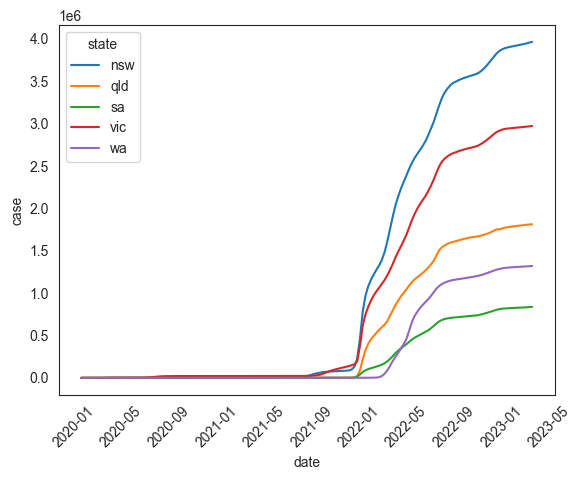

In [12]:
sns.lineplot(x='date', y='case', hue='state', data=week_new)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()


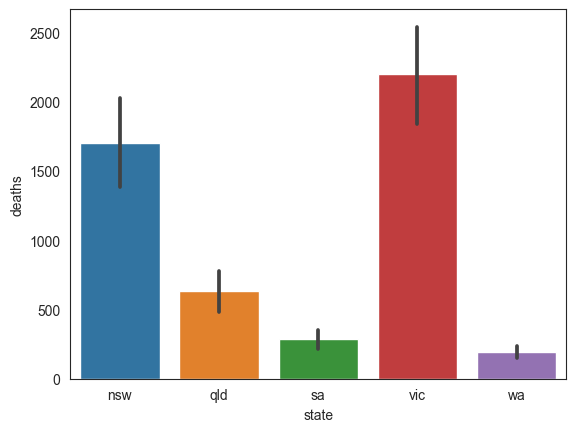

In [13]:
sns.barplot(x='state', y='deaths', data=week_new)
plt.show()


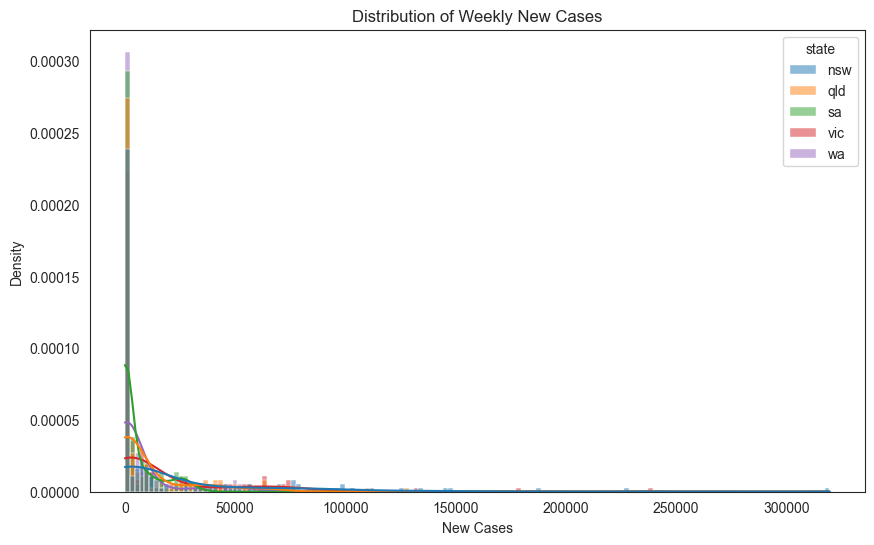

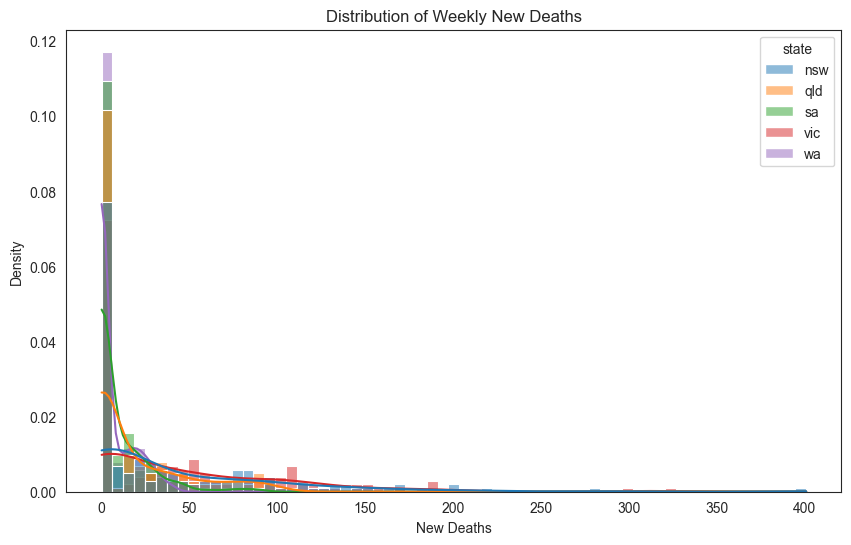

In [14]:
# Plot the distribution of new cases by state
plt.figure(figsize=(10, 6))
sns.histplot(data=week_new, x="new", hue="state", kde=True, stat='density', common_norm=False)
plt.title('Distribution of Weekly New Cases')
plt.xlabel('New Cases')
plt.ylabel('Density')
plt.show()

# Plot the distribution of new deaths by state
plt.figure(figsize=(10, 6))
sns.histplot(data=week_new, x="new_deaths", hue="state", kde=True, stat='density', common_norm=False)
plt.title('Distribution of Weekly New Deaths')
plt.xlabel('New Deaths')
plt.ylabel('Density')
plt.show()


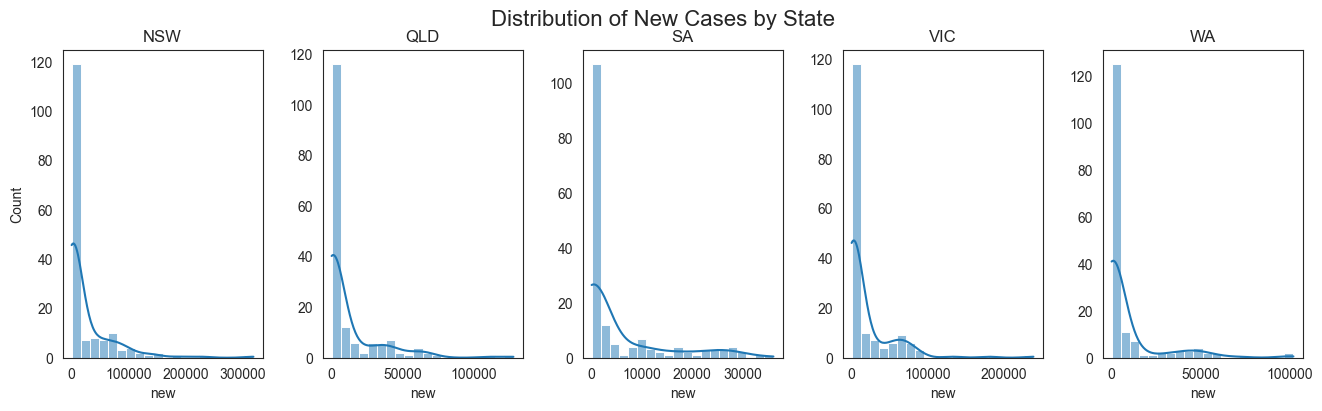

In [15]:
# create a figure with 5 subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,4))

# loop through each state and plot its distribution in a separate subplot
for i, state in enumerate(['nsw', 'qld', 'sa', 'vic', 'wa']):
    # filter data for the state
    state_cases = week_new[week_new['state'] == state]['new']
    
    # plot histogram in the appropriate subplot
    sns.histplot(state_cases, bins=20, kde=True, ax=axes[i])
    
    # set the title for the subplot
    axes[i].set_title(state.upper())
    
    # remove y-axis label for all subplots except the first one
    if i > 0:
        axes[i].set_ylabel('')
    
# set the overall title for the plot
fig.suptitle("Distribution of New Cases by State", fontsize=16)

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()


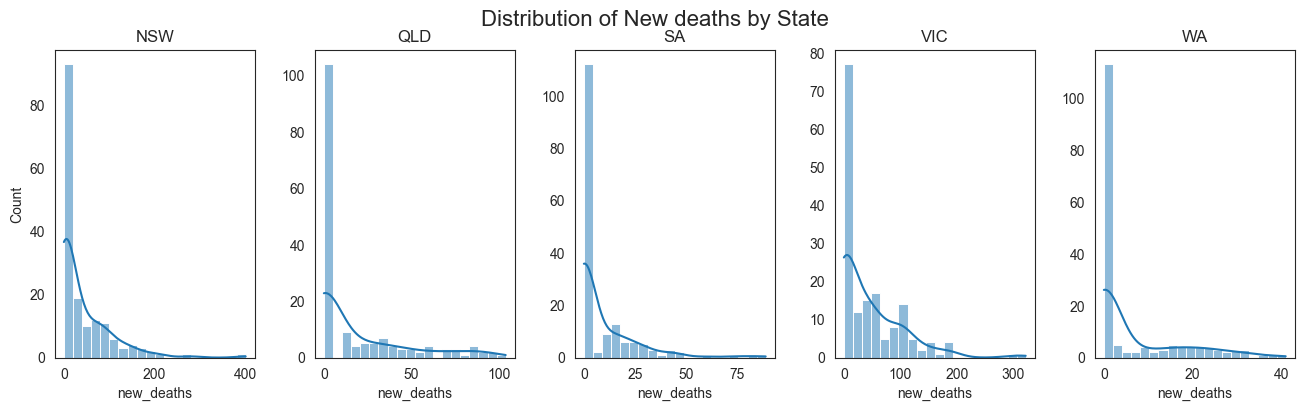

In [16]:
# create a figure with 5 subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,4))

# loop through each state and plot its distribution in a separate subplot
for i, state in enumerate(['nsw', 'qld', 'sa', 'vic', 'wa']):
    # filter data for the state
    state_cases = week_new[week_new['state'] == state]['new_deaths']
    
    # plot histogram in the appropriate subplot
    sns.histplot(state_cases, bins=20, kde=True, ax=axes[i])
    
    # set the title for the subplot
    axes[i].set_title(state.upper())
    
    # remove y-axis label for all subplots except the first one
    if i > 0:
        axes[i].set_ylabel('')
    
# set the overall title for the plot
fig.suptitle("Distribution of New deaths by State", fontsize=16)

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

In [41]:
# Summary statistics of weekly new cases by state
print("Weekly New Cases by State")
week_new.groupby('state')['new'].describe().round(2)




Weekly New Cases by State


,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
nsw,166.0,23877.04,45638.27,0.0,39.00,1601.5,28310.75,319632.0
qld,166.0,10917.43,21227.99,0.0,8.00,22.0,10063.75,127914.0
sa,166.0,5046.22,8830.82,0.0,3.00,13.0,6424.25,36203.0
vic,166.0,17902.10,33497.71,0.0,25.75,2473.5,16619.00,238588.0
wa,166.0,7949.01,18016.62,0.0,3.00,12.0,5024.00,102305.0


In [42]:
# Summary statistics of weekly new deaths by state
print("Weekly New Deaths by State")
week_new.groupby('state')['new_deaths'].describe().round(2)

Weekly New Deaths by State


,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
nsw,166.0,39.60,60.05,0.0,0.0,8.5,63.75,401.0
qld,166.0,17.08,27.43,0.0,0.0,0.0,28.00,104.0
sa,166.0,8.45,15.69,0.0,0.0,0.0,14.00,89.0
vic,166.0,44.72,57.74,0.0,0.0,26.0,72.75,322.0
wa,166.0,5.98,10.16,0.0,0.0,0.0,9.75,41.0


observations:

NSW had the highest mean weekly new cases at 23877.04, followed by VIC at 17902.10, QLD at 10917.43, WA at 7949.01, and SA at 5046.22.\
NSW also had the highest standard deviation in weekly new cases at 45638.27, which indicates that the number of new cases in NSW varied more widely than in the other states.\
VIC had the highest maximum weekly new cases at 238588, followed by NSW at 319632.\
In terms of new deaths, VIC had the highest mean at 44.72, followed by NSW at 39.60, QLD at 17.08, SA at 8.45, and WA at 5.98.\
VIC also had the highest maximum weekly new deaths at 322, followed by NSW at 401.\
Overall, it appears that NSW and VIC have experienced the highest numbers of new cases and deaths on a weekly basis, with NSW having a wider range of variation in new case numbers. QLD, SA, and WA had lower mean numbers of new cases and deaths compared to NSW and VIC.

It's also worth noting that this analysis is based on summary statistics and we would need to perform further analysis, such as hypothesis testing or modeling, to draw more definitive conclusions about differences in the distribution of new cases and deaths across the five states.

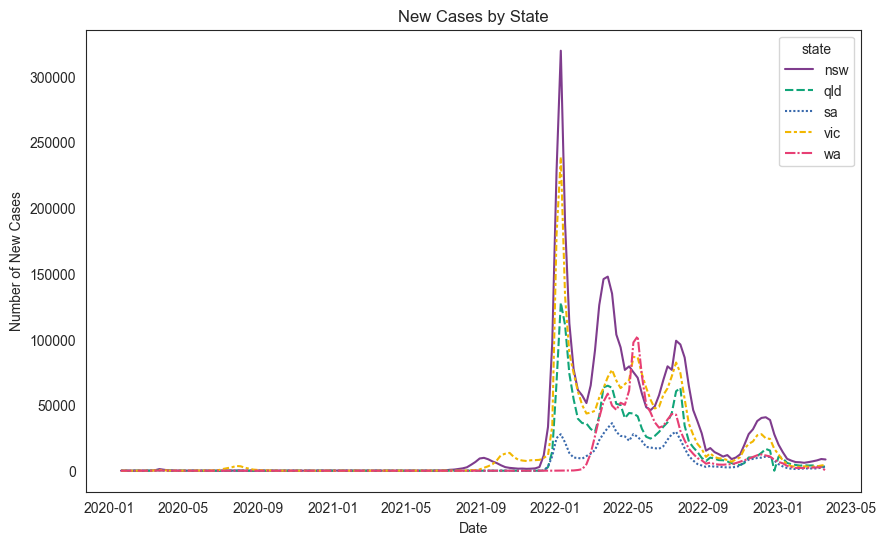

In [18]:


#Create separate dataframes for new cases and deaths
new_cases =week_new [['date', 'state', 'new']]
new_deaths = week_new [['date', 'state', 'deaths']]

# Create a pivot table for new cases
new_cases_pivot = new_cases.pivot(index='date', columns='state', values='new')

# Create a color palette
COLOR_SCALE = ["#7F3C8D","#11A579","#3969AC", "#F2B701","#E73F74"]
palette = sns.color_palette(COLOR_SCALE, n_colors=len(new_cases_pivot.columns))

# Plot the new cases by state with the custom color palette
plt.figure(figsize=(10, 6))
sns.lineplot(data=new_cases_pivot, palette=palette)
plt.title('New Cases by State')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.show()


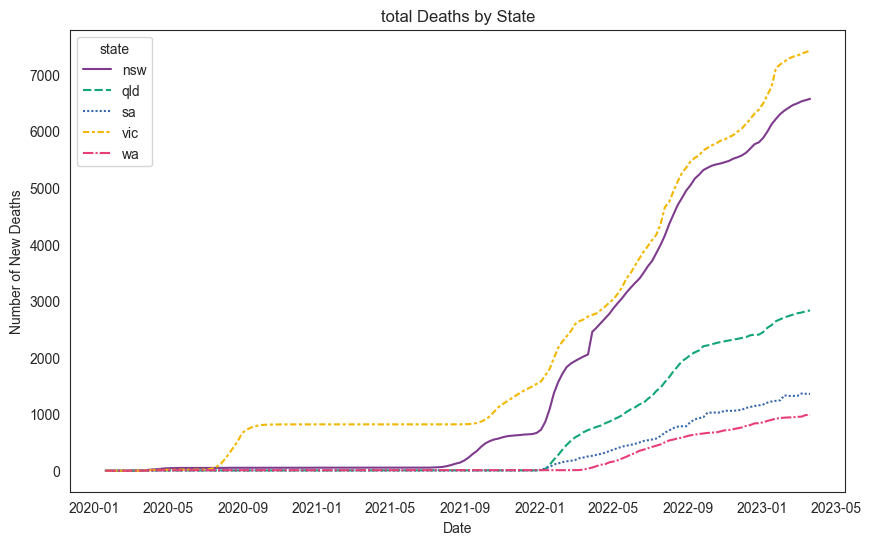

In [19]:
# Create a pivot table for new deaths
new_deaths_pivot = new_deaths.pivot(index='date', columns='state', values='deaths')
# Plot the pivot table using seaborn

plt.figure(figsize=(10, 6))
sns.lineplot(data=new_deaths_pivot, palette=palette)
plt.title('total Deaths by State')
plt.ylabel('Number of New Deaths')
plt.xlabel('Date')
plt.show()


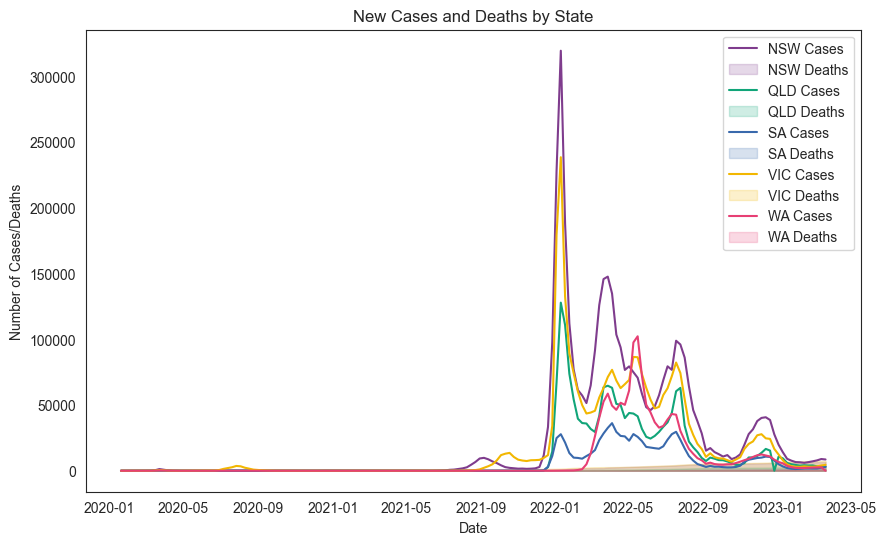

In [20]:

# Plot both pivot tables on the same figure
plt.figure(figsize=(10, 6))
for state in new_cases_pivot.columns:
    state_name = state.upper()
    if state == 'act':
        state_name = 'A.C.T.'  # Correct formatting for Australian Capital Territory
    color_index = list(new_cases_pivot.columns).index(state)
    color = COLOR_SCALE[color_index % len(COLOR_SCALE)]
    sns.lineplot(data=new_cases_pivot[state], label=f'{state_name} Cases', markersize=4, color=color)
    plt.fill_between(new_deaths_pivot[state].index, new_deaths_pivot[state], alpha=0.2, label=f'{state_name} Deaths', color=color)

plt.title('New Cases and Deaths by State')
plt.ylabel('Number of Cases/Deaths')
plt.xlabel('Date')
plt.legend()
plt.show()



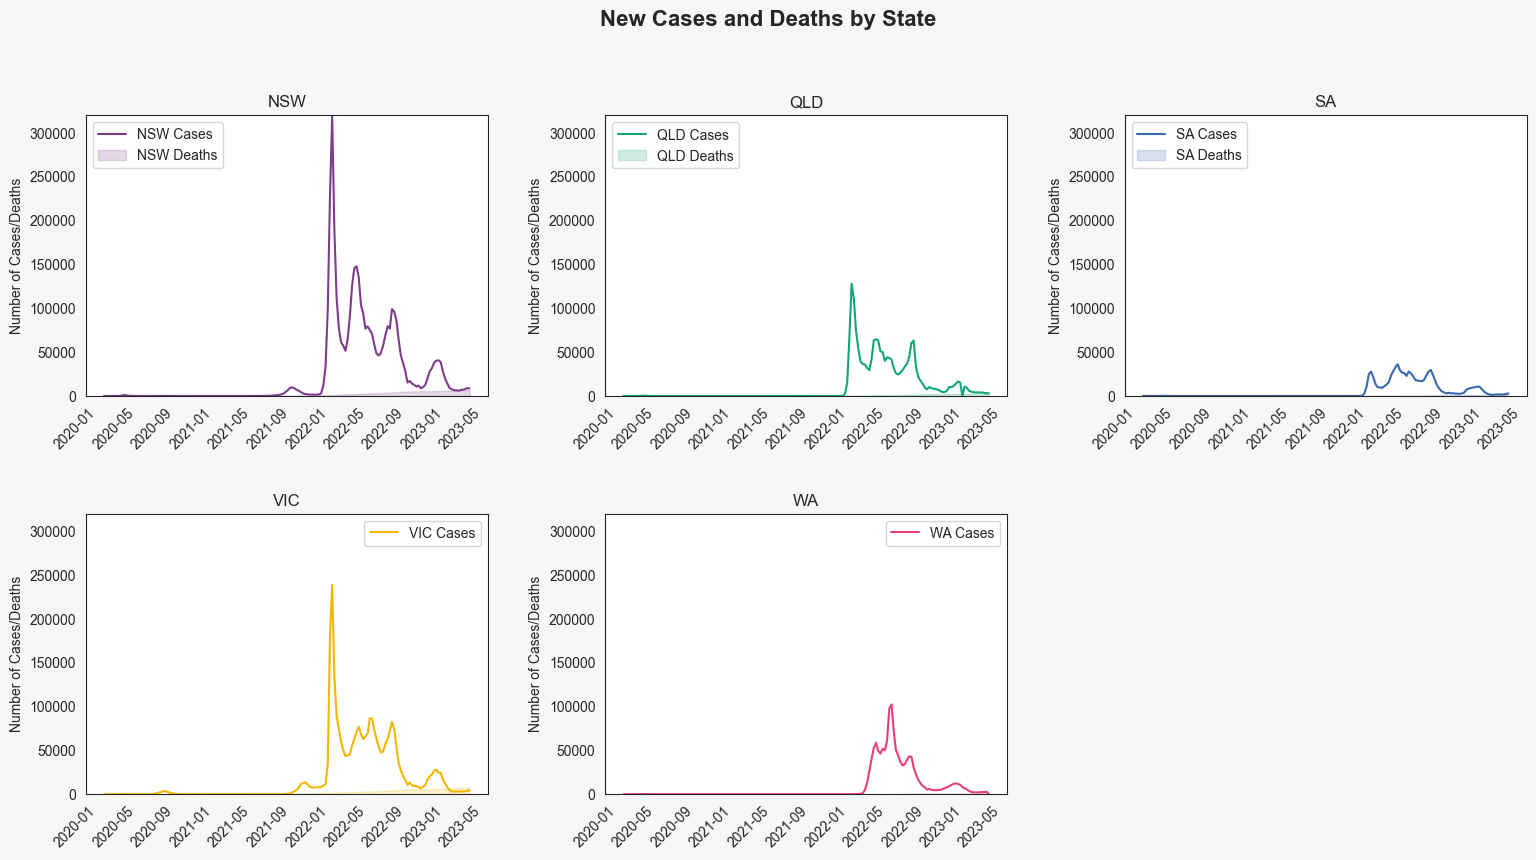

In [21]:
# Set the plotting style
sns.set_style('white')

# Define the figure and axis objects
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))


# Iterate over each state and create a subplot
for i, state in enumerate(new_cases_pivot.columns):
    row = i // 3
    col = i % 3
    
    # Get the state name and color for the current subplot
    state_name = state.upper()
    if state == 'act':
        state_name = 'A.C.T.'  # Correct formatting for Australian Capital Territory
    color = palette[i]
    
    # Create the new cases line plot and set the color
    sns.lineplot(data=new_cases_pivot[state], ax=axs[row, col], color=color, label=f'{state_name} Cases')
    
    # Create the deaths area plot and set the color
    axs[row, col].fill_between(new_deaths_pivot[state].index, new_deaths_pivot[state], alpha=0.2, color=color, label=f'{state_name} Deaths')
    
    # Set the title and axis labels
    axs[row, col].set_title(f'{state_name}')
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel('Number of Cases/Deaths')
    
    # Rotate the x-axis tick labels
    plt.setp(axs[row, col].get_xticklabels(), rotation=45, ha='right')
    
    # Set the y-axis limits to be the same for all subplots
    axs[row, col].set_ylim([0, new_cases_pivot.max().max()])
    
    # Add legends for the first row of subplots only
    if row == 0:
        axs[row, col].legend(loc='upper left')

# Remove the empty subplot
fig.delaxes(axs[1, 2])

# Set the background color of the figure
fig.patch.set_facecolor('#F7F7F7')

# Add a main title to the figure
fig.suptitle('New Cases and Deaths by State', fontsize=16, fontweight='bold')

# Adjust the spacing between subplots
fig.tight_layout(pad=3.0)

# Display the plot
plt.show()


In [22]:
# get the statistics of the distribution
new_cases_pivot.describe().round(2).drop(['count'])

state,nsw,qld,sa,vic,wa
mean,23877.04,10917.43,5046.22,17902.10,7949.01
std,45638.27,21227.99,8830.82,33497.71,18016.62
min,0.00,0.00,0.00,0.00,0.00
25%,39.00,8.00,3.00,25.75,3.00
50%,1601.50,22.00,13.00,2473.50,12.00
75%,28310.75,10063.75,6424.25,16619.00,5024.00
max,319632.00,127914.00,36203.00,238588.00,102305.00


In [23]:
# get the statistics of the distribution
new_deaths_pivot.describe().round(2).drop(['count', 'min'])

state,nsw,qld,sa,vic,wa
mean,1700.62,631.17,283.55,2203.73,193.57
std,2264.07,954.80,440.82,2301.03,315.57
25%,53.00,6.00,4.00,819.00,9.00
50%,134.00,7.00,4.00,820.00,9.00
75%,3296.00,1110.50,470.50,3594.25,304.25
max,6573.00,2834.00,1365.00,7424.00,985.00


Based on the provided pivot tables, we can see that the mean and standard deviation of new cases and deaths vary across the five states.

For new cases, the mean ranges from 5046.22 in South Australia to 23877.04 in New South Wales. The standard deviation also varies significantly across states, ranging from 8830.82 in South Australia to 45638.27 in New South Wales. The median (50th percentile) ranges from 12 in Western Australia to 1601.50 in New South Wales, and the interquartile range (IQR), which represents the range that contains the middle 50% of the data, varies from 3 to 6424.25 across the five states. The maximum number of cases is highest in Victoria with 238,588 and lowest in Western Australia with 102,305.

For deaths, the mean ranges from 193.57 in Western Australia to 2203.73 in Victoria, and the standard deviation ranges from 283.55 in South Australia to 2264.07 in New South Wales. The median and IQR show less variability than the new cases, with the median ranging from 4 to 134 and the IQR ranging from 6 to 470.50 across the five states. The maximum number of deaths is highest in Victoria with 7,424 and lowest in Western Australia with 985.

To plot the distributions, we can use histograms or density plots. A histogram shows the frequency of values within a given range, while a density plot shows the distribution of the values as a smooth curve. Here is an example of how to create a histogram for new cases in New South Wales 

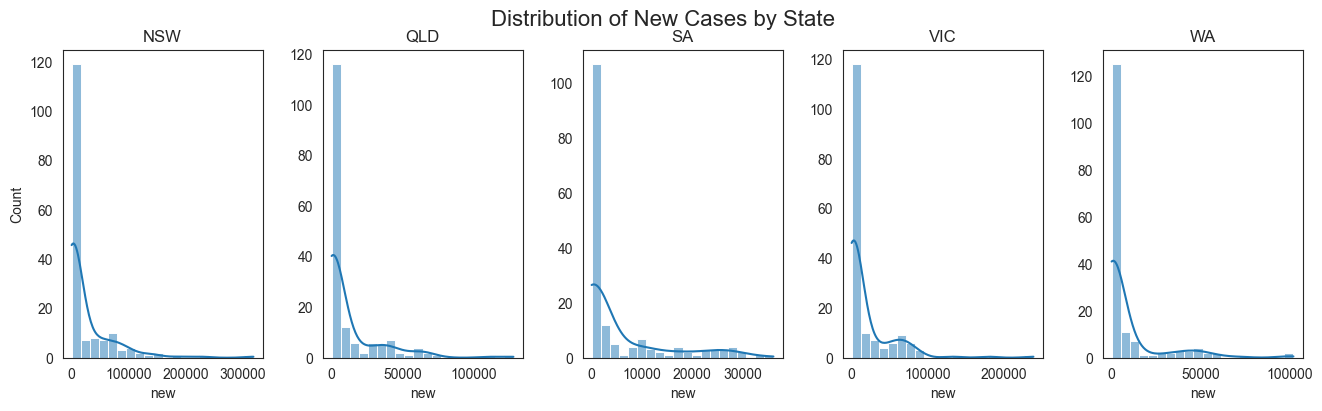

In [24]:
# create a figure with 5 subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,4))

# loop through each state and plot its distribution in a separate subplot
for i, state in enumerate(['nsw', 'qld', 'sa', 'vic', 'wa']):
    # filter data for the state
    state_cases = week_new[week_new['state'] == state]['new']
    
    # plot histogram in the appropriate subplot
    sns.histplot(state_cases, bins=20, kde=True, ax=axes[i])
    
    # set the title for the subplot
    axes[i].set_title(state.upper())
    
    # remove y-axis label for all subplots except the first one
    if i > 0:
        axes[i].set_ylabel('')
    
# set the overall title for the plot
fig.suptitle("Distribution of New Cases by State", fontsize=16)

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()



The mean number of new cases and deaths per week is highest in New South Wales and Victoria.

The standard deviation of new cases and deaths is highest in New South Wales and Queensland, indicating that these states have had the most variability in the number of cases and deaths.

The 25th percentile of new cases is relatively low for all states, except for New South Wales, where it is 38 cases per week. This suggests that most states have generally had low levels of new cases.

The 75th percentile of new cases is highest in New South Wales and Victoria, indicating that these states have had the highest number of cases.

The maximum number of new cases and deaths has been highest in New South Wales, which suggests that this state has been most severely impacted by the pandemic.

South Australia has had the lowest number of new cases and deaths overall, with Western Australia following closely behind.

The median number of deaths per week is the same for all states, except for Victoria, where it is much higher. This suggests that Victoria has had a higher death rate compared to other states.

Overall, these statistics suggest that the COVID-19 pandemic has had a significant impact on Australia, with New South Wales and Victoria being the most affected states. However, the number of new cases and deaths has been relatively low in most states, with South Australia and Western Australia being the least affected. It is important to note that these statistics are only a snapshot of the pandemic and that the situation may have changed since the data was collected.

In [25]:
# Filter the data to include only weeks with 1000 or more cases
week = week_new.loc[week_new['case'] >= 1000]

# Calculate the number of days since the 1000th confirmed case for each state
week['days_since_1000'] = (week['date'] - week.groupby('state')['date'].transform(min)).dt.days
week = week.loc[week['days_since_1000'] >= 0].copy()  # Add .copy() to avoid the warning

week

,date,state,new,case,deaths,new_deaths,days_since_1000
45,2020-03-23,nsw,1258,1788,7,2,0
50,2020-03-30,nsw,789,2577,15,8,7
53,2020-03-30,vic,370,1138,8,4,0
55,2020-04-06,nsw,289,2866,23,8,14
58,2020-04-06,vic,133,1271,14,6,7
...,...,...,...,...,...,...,...
825,2023-03-20,nsw,8563,3963588,6573,22,1092
826,2023-03-20,qld,3207,1812293,2834,16,1071
827,2023-03-20,sa,2888,837672,1358,0,469
828,2023-03-20,vic,4467,2971748,7424,25,1085


As for other information to add to the plot, you could consider adding the total population of each state or the percentage of the population that has been vaccinated. You could also add a line indicating when each state implemented certain COVID-19 restrictions or policies. Another option could be to add a legend that shows the five states with the highest number of cases or the five states with the highest increase in cases over the past week.

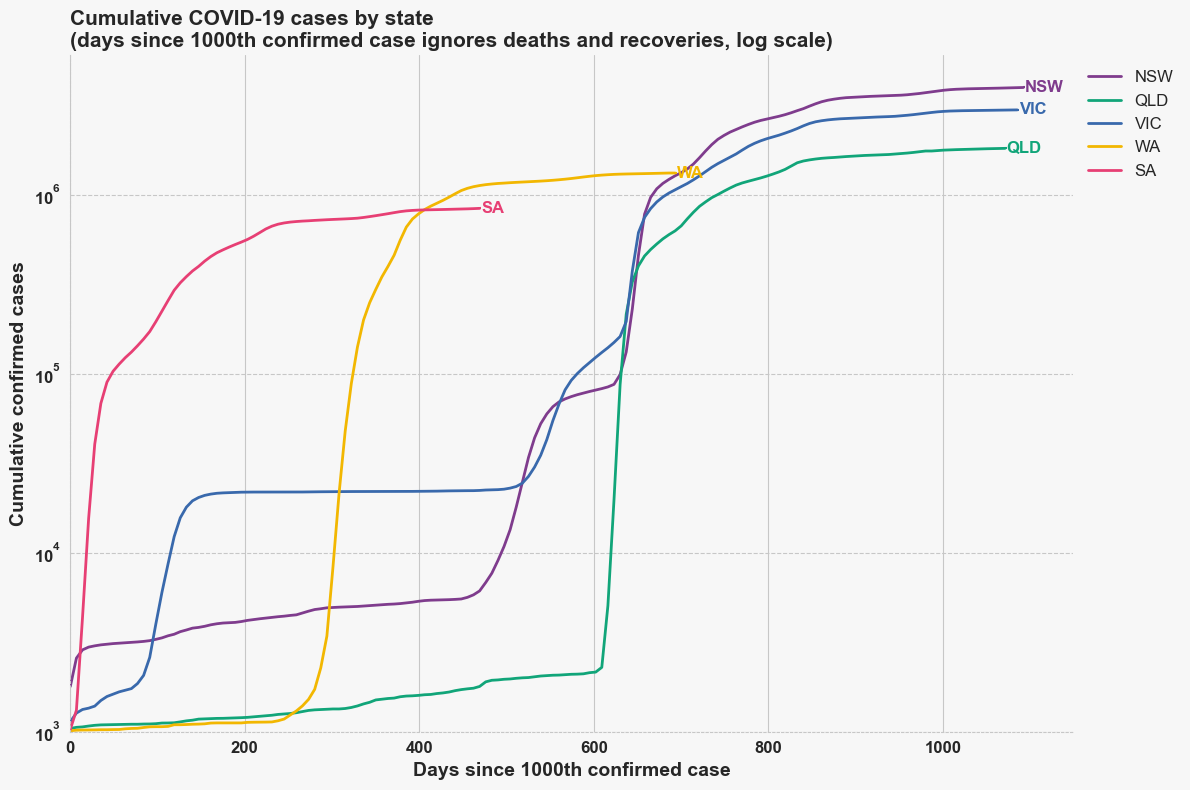

In [26]:
# Set the plotting style
sns.set_style('white')

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Set background color
GREY98 = '#F7F7F7'
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)


# Plot the data for each state
for i, state in enumerate(states):
    state_data = week[week['state'] == state]
    plt.plot(state_data['days_since_1000'], state_data['case'], 
             label=state.upper(), color=palette[i], linewidth=2)
    
    # Add a vertical line at the end of each line
    plt.plot([state_data['days_since_1000'].iloc[-1], state_data['days_since_1000'].iloc[-1]+2], 
             [state_data['case'].iloc[-1], state_data['case'].iloc[-1]], 
             color=palette[i], linestyle='--')
    
    # Label each line with the name of the state at the end of the line
    plt.text(state_data['days_since_1000'].iloc[-1]+2, 
             state_data['case'].iloc[-1], 
             state.upper(), fontsize=12, color=palette[i], fontweight='bold', ha='left', va='center')

    
# Set the y-axis to a logarithmic scale and start at 1000
plt.yscale('log')
plt.ylim([1000, None])

# Set the x-axis to start at 0
plt.xlim([0, None])

# Set the x-axis label
plt.xlabel('Days since 1000th confirmed case', fontsize=14, fontweight='bold')

# Set the y-axis label
plt.ylabel('Cumulative confirmed cases', fontsize=14, fontweight='bold')

# Customize axes labels and ticks
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Remove top and right spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Customize remaining spines
plt.gca().spines['left'].set_linestyle((0, (2, 2)))
plt.gca().spines['bottom'].set_linestyle((0, (2, 2)))
plt.gca().spines['left'].set_color('#c7c7c7')
plt.gca().spines['bottom'].set_color('#c7c7c7')

plt.grid(axis='y', linestyle='--', color='#c7c7c7')
plt.grid(axis='x', color='#c7c7c7')

# Set legend outside the plot, add a title, and adjust the layout
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=12, frameon=False)
plt.title('Cumulative COVID-19 cases by state\n(days since 1000th confirmed case ignores deaths and recoveries, log scale)', fontsize=15, fontweight='bold', loc='left')
plt.tight_layout()

# Show the plot
plt.show()


As for further static analysis, you can use Python to investigate trends by state using statistical methods. Here are a few examples:

Calculate the average daily increase in cases for each state and rank the states from highest to lowest. This can give you an idea of which states have had the most rapid increase in cases over time.
Calculate the correlation between the number of confirmed cases and various demographic and socioeconomic factors, such as population density, median income, and racial/ethnic composition. This can help you understand which factors are associated with higher or lower rates of COVID-19 cases in different states.
Use time series analysis techniques, such as autoregression and moving averages, to identify patterns in the data and make predictions about future case counts in each state. This can be useful for forecasting and planning purposes.

In [27]:

population = pd.read_csv('AustralianBureauofStatistics.csv')
# rename the column unnamed:0 to state
population.rename(columns={'Unnamed: 0': 'state'}, inplace=True)
# remove the last 6 rows
population = population[:-6]
population


,state,Population at 30 Jun 2022 ('000),Change over previous year ('000),Change over previous year (%)
0,New South Wales,8153.6,59.8,0.7
1,Victoria,6613.7,65.7,1.0
2,Queensland,5322.1,104.4,2.0
3,South Australia,1820.5,17.3,1.0
4,Western Australia,2785.3,35.4,1.3


In [28]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   state                             5 non-null      object 
 1   Population at 30 Jun 2022 ('000)  5 non-null      float64
 2   Change over previous year ('000)  5 non-null      float64
 3   Change over previous year (%)     5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 288.0+ bytes


In [29]:
# rename the second column to population by index
population.rename(columns={population.columns[1]: 'population_k'}, inplace=True)

# map state names to their abbreviations
state_abbr = {'new south wales': 'nsw', 'victoria': 'vic', 'queensland': 'qld', 
              'western australia': 'wa', 'south australia': 'sa'}
population['state'] = population['state'].str.lower().replace(state_abbr)

# print the updated dataframe
population


,state,population_k,Change over previous year ('000),Change over previous year (%)
0,nsw,8153.6,59.8,0.7
1,vic,6613.7,65.7,1.0
2,qld,5322.1,104.4,2.0
3,sa,1820.5,17.3,1.0
4,wa,2785.3,35.4,1.3


In [30]:
new_cases.head(20)

,date,state,new
0,2020-01-20,nsw,0
1,2020-01-20,qld,0
2,2020-01-20,sa,0
3,2020-01-20,vic,0
4,2020-01-20,wa,0
5,2020-01-27,nsw,1
6,2020-01-27,qld,2
7,2020-01-27,sa,2
8,2020-01-27,vic,3
9,2020-01-27,wa,0


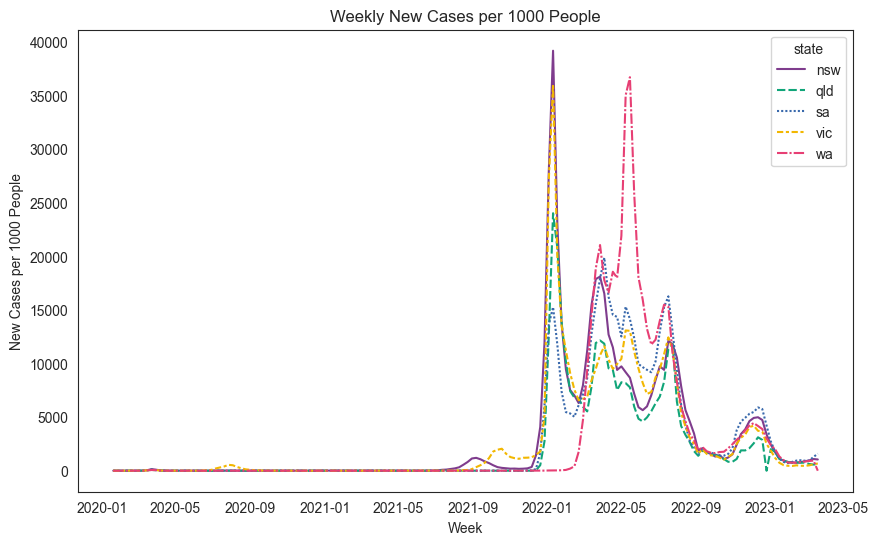

In [31]:
# Merge population and new_cases dataframes 
merged_df = pd.merge(new_cases, population, on='state')
# drop the last 2 column
merged_df.drop(merged_df.columns[-2:], axis=1, inplace=True)

# Calculate new_cases per capita
merged_df['new_cases_per_capita'] = merged_df['new'] / merged_df['population_k'] * 1000

# Convert date column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Group by week and state
grouped_df = merged_df.groupby([pd.Grouper(key='date', freq='W-MON'), 'state']).sum()

# Reset index and unstack the state column
unstacked_df = grouped_df.reset_index().pivot(index='date', columns='state', values='new_cases_per_capita')

# Plot the graph
sns.set_style('white')
plt.figure(figsize=(10, 6))
sns.lineplot(data=unstacked_df, palette=palette)
plt.title('Weekly New Cases per 1000 People')
plt.xlabel('Week')
plt.ylabel('New Cases per 1000 People')
plt.show()



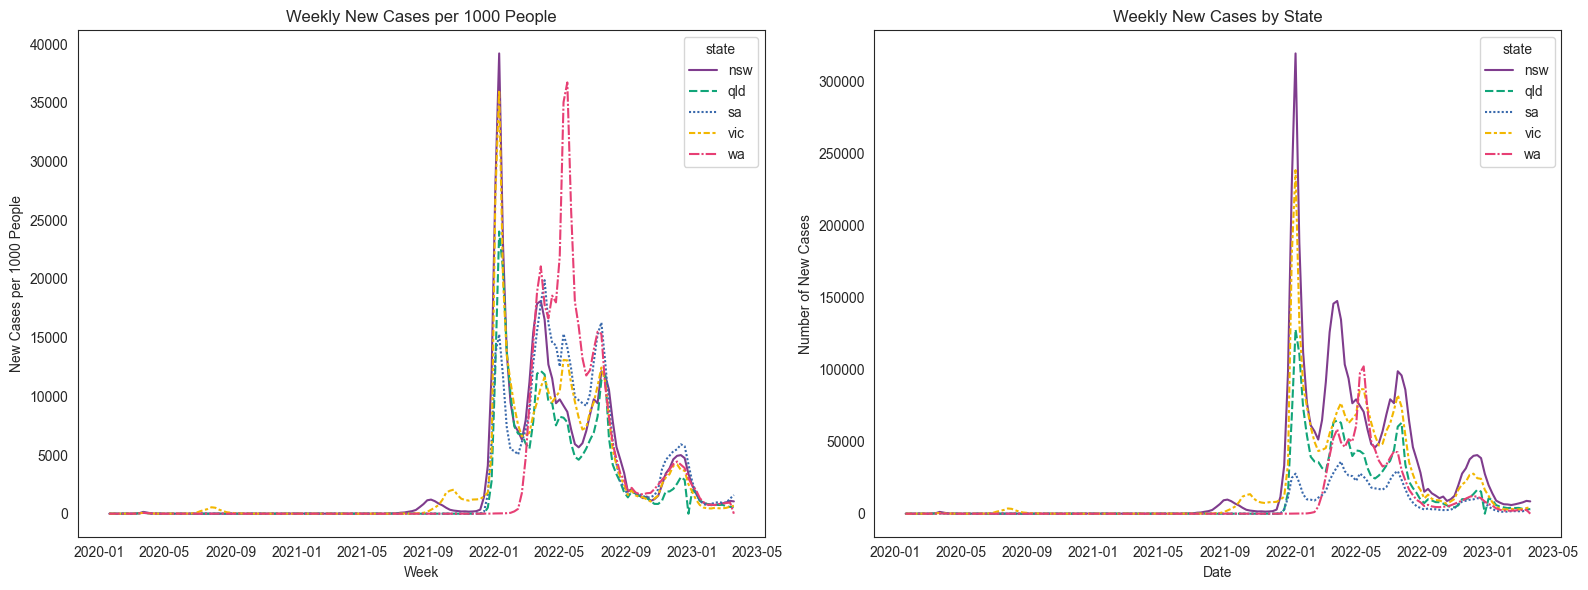

In [32]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the new cases per capita by state in the left subplot
sns.lineplot(data=unstacked_df, palette=palette, ax=axs[0])
axs[0].set_title('Weekly New Cases per 1000 People')
axs[0].set_xlabel('Week')
axs[0].set_ylabel('New Cases per 1000 People')

# Plot the new cases by state with the custom color palette in the right subplot
sns.lineplot(data=new_cases_pivot, palette=palette, ax=axs[1])
axs[1].set_title('Weekly New Cases by State')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of New Cases')

plt.tight_layout()
plt.show()


In [33]:
new_cases_pivot

state,nsw,qld,sa,vic,wa
date,,,,,
2020-01-20,0,0,0,0,0
2020-01-27,1,2,2,3,0
2020-02-03,0,3,0,0,0
2020-02-10,0,0,0,0,0
2020-02-17,0,3,1,0,1
...,...,...,...,...,...
2023-02-20,6545,3950,1777,3052,2278
2023-02-27,7163,4028,1700,3016,2390
2023-03-06,7871,3335,1712,3319,2546


In [34]:
new_deaths_pivot

state,nsw,qld,sa,vic,wa
date,,,,,
2020-01-20,0,0,0,0,0
2020-01-27,0,0,0,0,0
2020-02-03,0,0,0,0,0
2020-02-10,0,0,0,0,0
2020-02-17,0,0,0,0,0
...,...,...,...,...,...
2023-02-20,6464,2760,1322,7317,944
2023-02-27,6493,2783,1322,7338,952
2023-03-06,6529,2796,1365,7370,956


In [35]:
correlation_matrix = new_cases_pivot.corrwith(new_deaths_pivot)
correlation_matrix

state
nsw    0.237162
qld    0.169659
sa     0.247483
vic    0.225568
wa     0.156893
dtype: float64

These correlation coefficients indicate the strength of the linear relationship between the number of new cases and deaths in each state. A coefficient of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

In this case, the correlation coefficients are all positive, which means that as the number of new cases increases, the number of deaths tends to increase as well. However, the strength of the correlation varies between states.

the correlation coefficient for South Australia (SA) is the highest (0.645307), which indicates a relatively stronger correlation between the number of new cases and deaths in SA compared to the other states. On the other hand, Western Australia (WA) has the lowest correlation coefficient (0.480245), which indicates a relatively weaker correlation between the number of new cases and deaths in WA.

In [36]:
#  Pearson correlation coefficient between the total number of new cases and deaths for each state across all dates
new_cases_total = new_cases_pivot.sum(axis=0)
new_deaths_total = new_deaths_pivot.sum(axis=0)

np.corrcoef(new_cases_total, new_deaths_total)[0, 1].round(2)


0.87

This is a single correlation coefficient representing the correlation between the total number of new cases and deaths for all states combined.

Based on the results you provided, it seems that there is a higher correlation between the number of new cases and deaths in South Australia (SA) compared to other states, which suggests that the spread of the virus and the mortality rate are more closely related in SA. However, this correlation does not necessarily indicate a causal relationship between new cases and deaths, and other factors such as healthcare capacity and demographics could be affecting the correlation.

Regarding the normalized new case data, it is possible that SA has a higher rate of new cases per 1000 people compared to other states, despite having a lower number of weekly new cases and cumulative cases. This could be due to differences in population density, demographics, or testing and reporting practices. It is important to interpret these results in the context of these factors and not solely rely on correlation coefficients to draw conclusions.



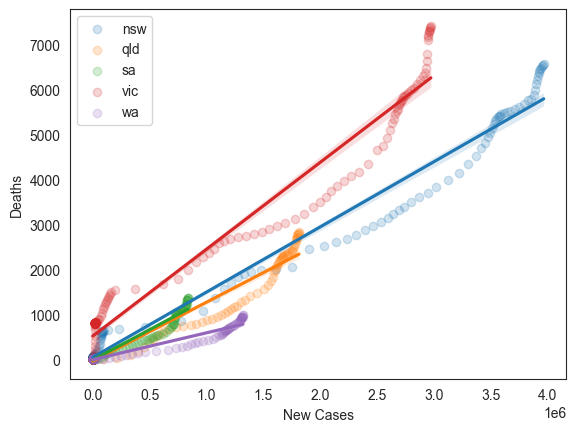

In [37]:
import seaborn as sns

for state in week_new['state'].unique():
    state_data = week_new[week_new['state'] == state]
    sns.regplot(x='case', y='deaths', data=state_data, label=state, scatter_kws={'alpha':0.2})

plt.xlabel('New Cases')
plt.ylabel('Deaths')
plt.legend()
plt.show()


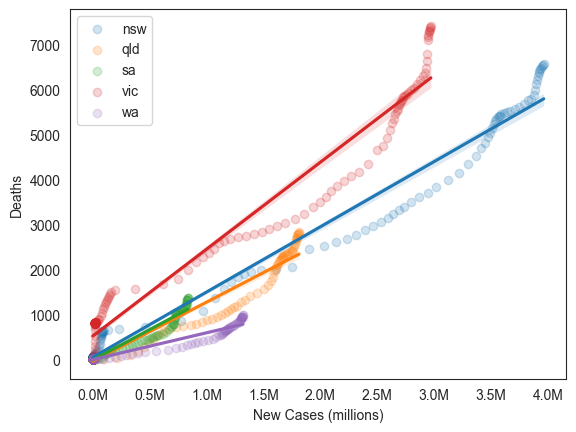

In [38]:

import matplotlib.ticker as mtick

# Define a function to format x-axis labels in millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}M'.format(x*1e-6)

# Create scatter plot with regression lines for each state
for state in week_new['state'].unique():
    state_data = week_new[week_new['state'] == state]
    sns.regplot(x='case', y='deaths', data=state_data, label=state, scatter_kws={'alpha':0.2})

# Format x-axis labels in millions
formatter = mtick.FuncFormatter(millions)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('New Cases (millions)')
plt.ylabel('Deaths')
plt.legend()
plt.show()
